In [84]:
import pandas as pd
import numpy as np
import pickle

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


In [5]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Dataset Column Descriptions:

1. age: Age in years.
2. sex: Sex (1 = male; 0 = female).
3. cp: Chest pain type
   - Value 1: typical angina
   - Value 2: atypical angina
   - Value 3: non-anginal pain
   - Value 4: asymptomatic

4. trestbps: Resting blood pressure (in mm Hg on admission to the hospital).
5. chol: Serum cholestoral in mg/dl.
6. fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).
7. restecg: Resting electrocardiographic results
   - Value 0: normal
   - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

8. thalach: Maximum heart rate achieved during exercise.
9. exang: Exercise-induced angina (1 = yes; 0 = no).
10. oldpeak: ST depression induced by exercise relative to rest.
11. slope: The slope of the peak exercise ST segment
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping

12. ca: Number of major vessels (0-3) colored by fluoroscopy.
13. thal: Thallium stress test result
    - Value 1: normal
    - Value 2: fixed defect
    - Value 3: reversible defect

14. target: Diagnosis of heart disease (angiographic disease status)
    - Value 0: < 50% diameter narrowing
    - Value 1: > 50% diameter narrowing


EDA

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

disease:  526
no disease:  499


Text(0.5, 1.0, 'disease(1) vs no disease(0)')

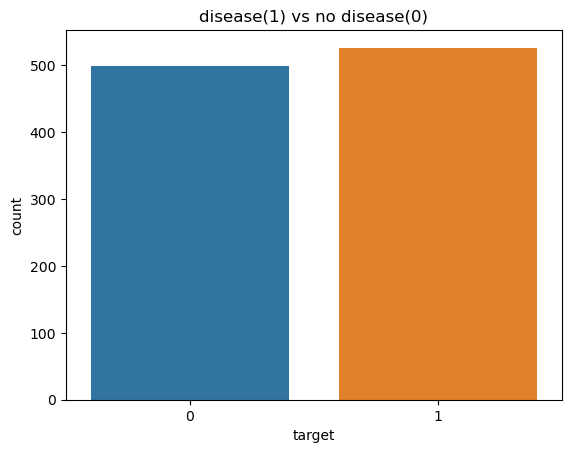

In [92]:
disease = sum(data['target']==1)
no_disease = sum(data['target']==0)
print('disease: ', disease)
print('no disease: ',no_disease)
sns.countplot(data = data, x='target').set_title('disease(1) vs no disease(0)')


<Axes: xlabel='age', ylabel='Count'>

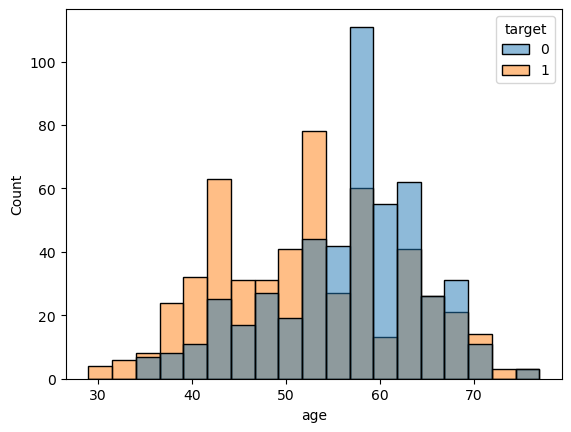

In [10]:
sns.histplot(data = data , x= 'age', hue= 'target', )

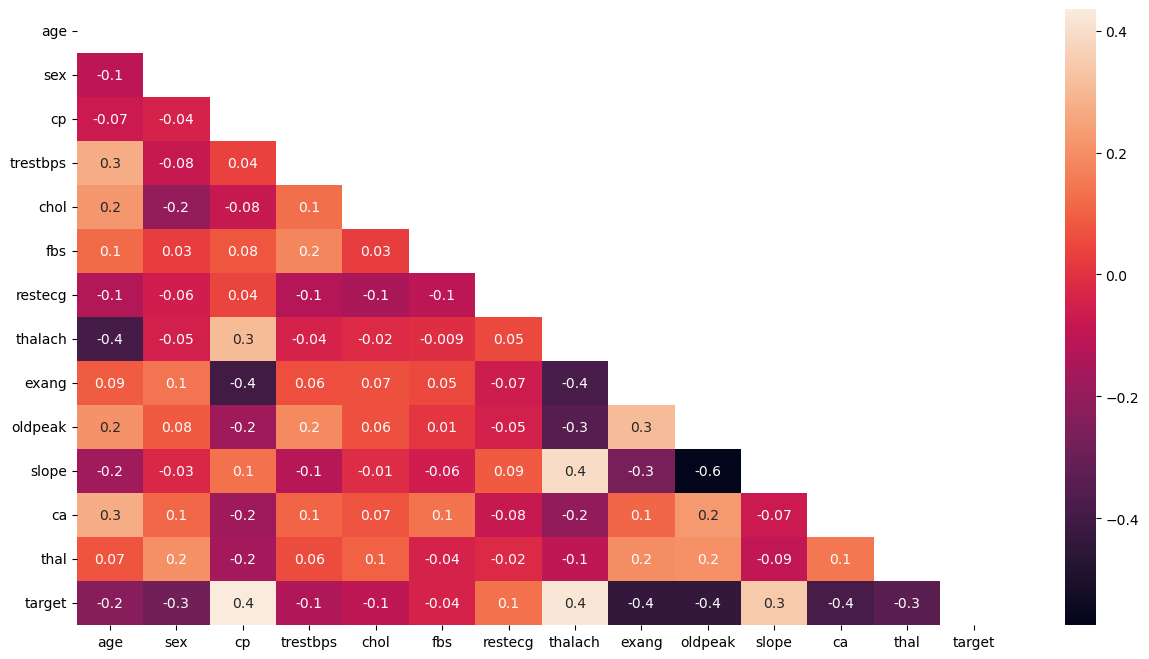

In [13]:
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(data.corr(),mask = mask,annot = True, fmt='.1g',ax=ax);

Text(0.5, 1.0, 'Before preprocessing')

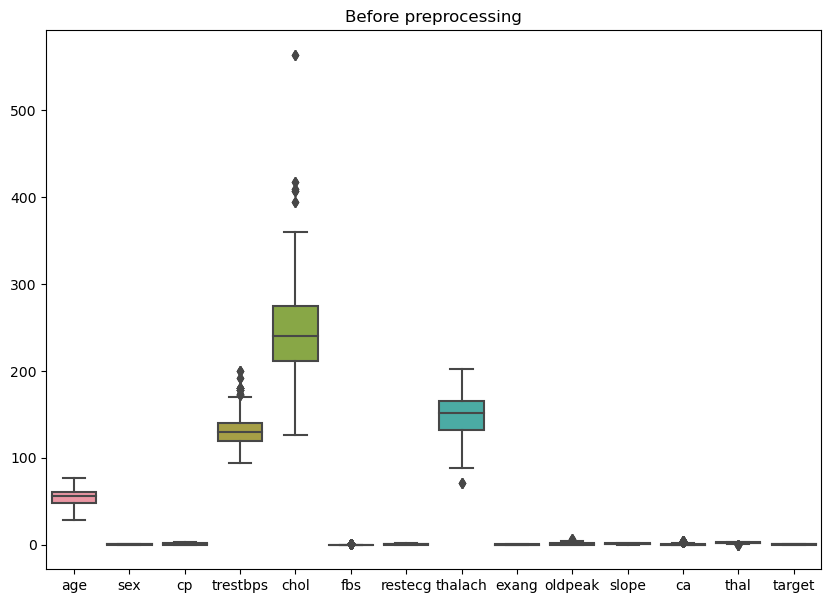

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data).set_title("Before preprocessing")


train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [17]:
X=data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y=data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
sc = StandardScaler()

In [20]:
X_train= sc.fit_transform(X_train)


824

In [21]:
X_test = sc.transform(X_test)

Text(0.5, 1.0, 'After preprocessing')

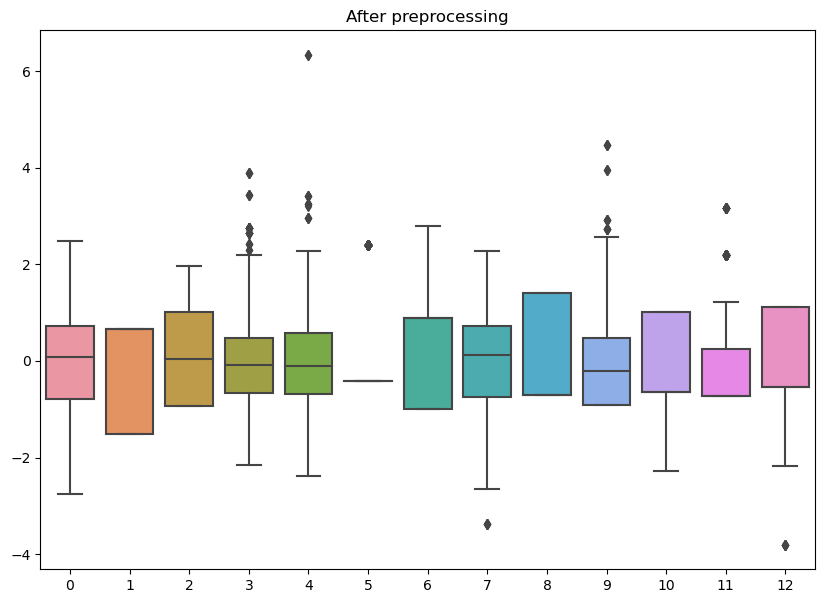

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(data=X_train).set_title("After preprocessing")

In [85]:
with open('X_train.pkl', 'wb') as f:
    pickle.dump(X_train, f)

with open('y_train.pkl', 'wb') as f:
    pickle.dump(y_train, f)

with open('X_test.pkl', 'wb') as f:
    pickle.dump(X_test, f)

with open('y_test.pkl', 'wb') as f:
    pickle.dump(y_test, f)

# Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression 

In [24]:
logreg = LogisticRegression()

In [25]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [26]:
logreg_pred=logreg.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
def scores(y_test,y_pred,model):
    cm = confusion_matrix(y_test, y_pred)
    print('Confusion Matrix:\n', cm ,'\n')
    cr = classification_report(y_test, y_pred)
    print('Classification report:\n', cr ,'\n')

    #scores
    score_train = round(model.score(X_train, y_train),3)
    score_test = round(model.score(X_test, y_test),3)
    print('Training Score: ',score_train)
    print('Testing Score: ',score_test)

In [29]:
scores(y_test, logreg_pred,logreg)

Confusion Matrix:
 [[42 16]
 [ 5 40]] 

Classification report:
               precision    recall  f1-score   support

           0       0.89      0.72      0.80        58
           1       0.71      0.89      0.79        45

    accuracy                           0.80       103
   macro avg       0.80      0.81      0.80       103
weighted avg       0.82      0.80      0.80       103
 

Training Score:  0.85
Testing Score:  0.796


In [79]:
with open('logreg_pred.pkl', 'wb') as f:
    pickle.dump(logreg_pred, f)

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
tree= DecisionTreeClassifier()

In [32]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [33]:
tree_pred = tree.predict(X_test)

In [34]:
scores(y_test, tree_pred,logreg)

Confusion Matrix:
 [[58  0]
 [ 3 42]] 

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103
 

Training Score:  0.85
Testing Score:  0.796


In [80]:
with open('tree_pred.pkl', 'wb') as f:
    pickle.dump(tree_pred, f)
    

# Random Forest Classifier

In [58]:
    from sklearn.ensemble import RandomForestClassifier

In [59]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=10, max_depth=9 , n_jobs=-1)

In [60]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000, n_jobs=-1,
                       random_state=10)

In [61]:
rfc_pred = rfc.predict(X_test)

In [91]:
scores(y_test, rfc_pred,rfc)

Confusion Matrix:
 [[58  0]
 [ 3 42]] 

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103
 

Training Score:  1.0
Testing Score:  0.971


<Axes: >

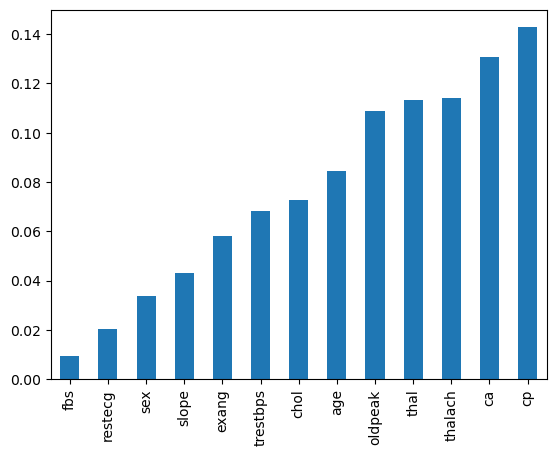

In [63]:
weights = rfc.feature_importances_
weights=pd.DataFrame(weights,list(data.columns)[:-1])
weights = weights.rename(columns={0:'Features_Importance'})
weights = weights.Features_Importance.sort_values()
weights.plot.bar()

In [81]:
with open('rfc_pred.pkl', 'wb') as f:
    pickle.dump(rfc_pred, f)

# XGBoost

In [64]:
!pip install xgboost

In [65]:
from xgboost import XGBClassifier

In [66]:
xgb = XGBClassifier()

In [67]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
xgb_pred = xgb.predict(X_test)

In [86]:
scores(y_test, xgb_pred,xgb)

Confusion Matrix:
 [[58  0]
 [ 3 42]] 

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103
 

Training Score:  1.0
Testing Score:  0.971


In [87]:
with open('xgb_pred.pkl', 'wb') as f:
    pickle.dump(xgb_pred, f)

KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score

In [71]:
#find the best value of K:
k_list = [i for i in range(1,31)]
k_dict={}

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    k_dict[k]= recall_score(y_test,knn_pred, average='micro')
    
    

    


In [72]:
k_dict

{1: 0.970873786407767,
 2: 0.970873786407767,
 3: 0.970873786407767,
 4: 0.9223300970873787,
 5: 0.8737864077669902,
 6: 0.8640776699029126,
 7: 0.7961165048543689,
 8: 0.7961165048543689,
 9: 0.8058252427184466,
 10: 0.8155339805825242,
 11: 0.8155339805825242,
 12: 0.8155339805825242,
 13: 0.8252427184466019,
 14: 0.8252427184466019,
 15: 0.8252427184466019,
 16: 0.8155339805825242,
 17: 0.7961165048543689,
 18: 0.7766990291262136,
 19: 0.7961165048543689,
 20: 0.7961165048543689,
 21: 0.8252427184466019,
 22: 0.8349514563106796,
 23: 0.8252427184466019,
 24: 0.8058252427184466,
 25: 0.8252427184466019,
 26: 0.8058252427184466,
 27: 0.8155339805825242,
 28: 0.8155339805825242,
 29: 0.8155339805825242,
 30: 0.8058252427184466}

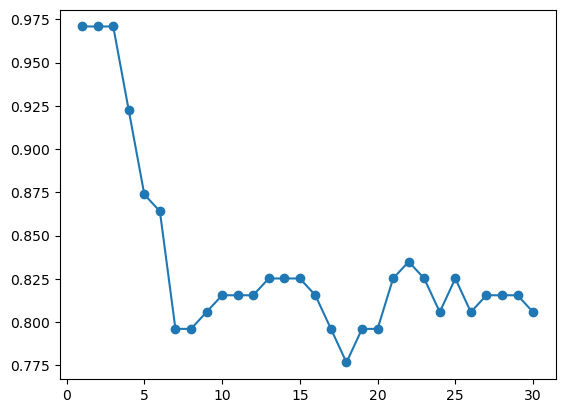

In [73]:
plt.plot( k_dict.keys(), k_dict.values(), marker = 'o',linestyle='-')

In [74]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

In [88]:
scores(y_test, knn_pred,knn)

Confusion Matrix:
 [[58  0]
 [ 3 42]] 

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        58
           1       1.00      0.93      0.97        45

    accuracy                           0.97       103
   macro avg       0.98      0.97      0.97       103
weighted avg       0.97      0.97      0.97       103
 

Training Score:  1.0
Testing Score:  0.971


In [83]:
with open('knn_pred.pkl', 'wb') as f:
    pickle.dump(knn_pred, f)

# Summary

In [93]:
summary = {
    'MODEL': ['Logistic Regression', 'DecisionTree', 'RandomForest', 'XGB', 'KNN'],
    'TRAINING': [
        round(logreg.score(X_train, y_train), 5),
        round(tree.score(X_train, y_train), 5),
        round(rfc.score(X_train, y_train), 5),
        round(xgb.score(X_train, y_train), 5),
        round(knn.score(X_train, y_train), 5),
    ],
    'TESTING': [
        round(logreg.score(X_test, y_test), 5),
        round(tree.score(X_test, y_test), 5),
        round(rfc.score(X_test, y_test), 5),
        round(xgb.score(X_test, y_test), 5),
        round(knn.score(X_test, y_test), 5),
    ]
}

summary_df = pd.DataFrame(summary)
summary_df


,MODEL,TRAINING,TESTING
0,Logistic Regression,0.85033,0.79612
1,DecisionTree,1.00000,0.97087
2,RandomForest,1.00000,0.97087
3,XGB,1.00000,0.97087
4,KNN,1.00000,0.97087
